# <font color="purple">10-SourceFunction</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

plt.rcParams['figure.dpi'] = 400

## 0. To execute: Below is the function that creates a gradiant of color between two curves, according to a certain function.

In [2]:
def rect(ax,x,y,w,h,c):
    #ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def rainbow_fill_between(ax, x, Y1, Y2, colors=None, 
                         cmap=plt.get_cmap("Greens"),**kwargs):
    plt.plot(x,Y1,lw=0)  # Plot so the axes scale correctly

    dx = x[1]-x[0]
    N  = x.size

    #Pad a float or int to same size as x
    if (type(Y2) is float or type(Y2) is int):
        Y2 = np.array([Y2]*N)

    #No colors -- specify linear
    if colors == None:
        colors = []
        for n in range(N):
            colors.append(cmap(n/float(N)))
    #Varying only in x
    elif len(colors.shape) == 1:
        colors = cmap((colors-colors.min())
                      /(colors.max()-colors.min()))
    #Varying only in x and y
    else:
        cnp = np.array(colors)
        colors = np.empty([colors.shape[0],colors.shape[1],4])
        for i in range(colors.shape[0]):
            for j in range(colors.shape[1]):
                colors[i,j,:] = cmap((cnp[i,j]-cnp[:,:].min())
                                    /(cnp[:,:].max()-cnp[:,:].min()))

    colors = np.array(colors)

    #Create the patch objects
    for (color,x,y1,y2) in zip(colors,x,Y1,Y2):
        rect(ax,x,y2,dx,y1-y2,color,**kwargs)

## 1. First, let's consider a case where there is only emission.

* The lenght of the slab is 4 length units. 


### a. The properties of the material are constant $\rho(s)=\rho_o$ and $j(s)=j_o$.
* The product of the emission coefficient and the density give an intensity of 0.25 per unit of length. 
>**TODO**: start from $dI=...$ find an equation for $I(s)$ and show your work below. Add a curve for $I(s)$ in the graph below.

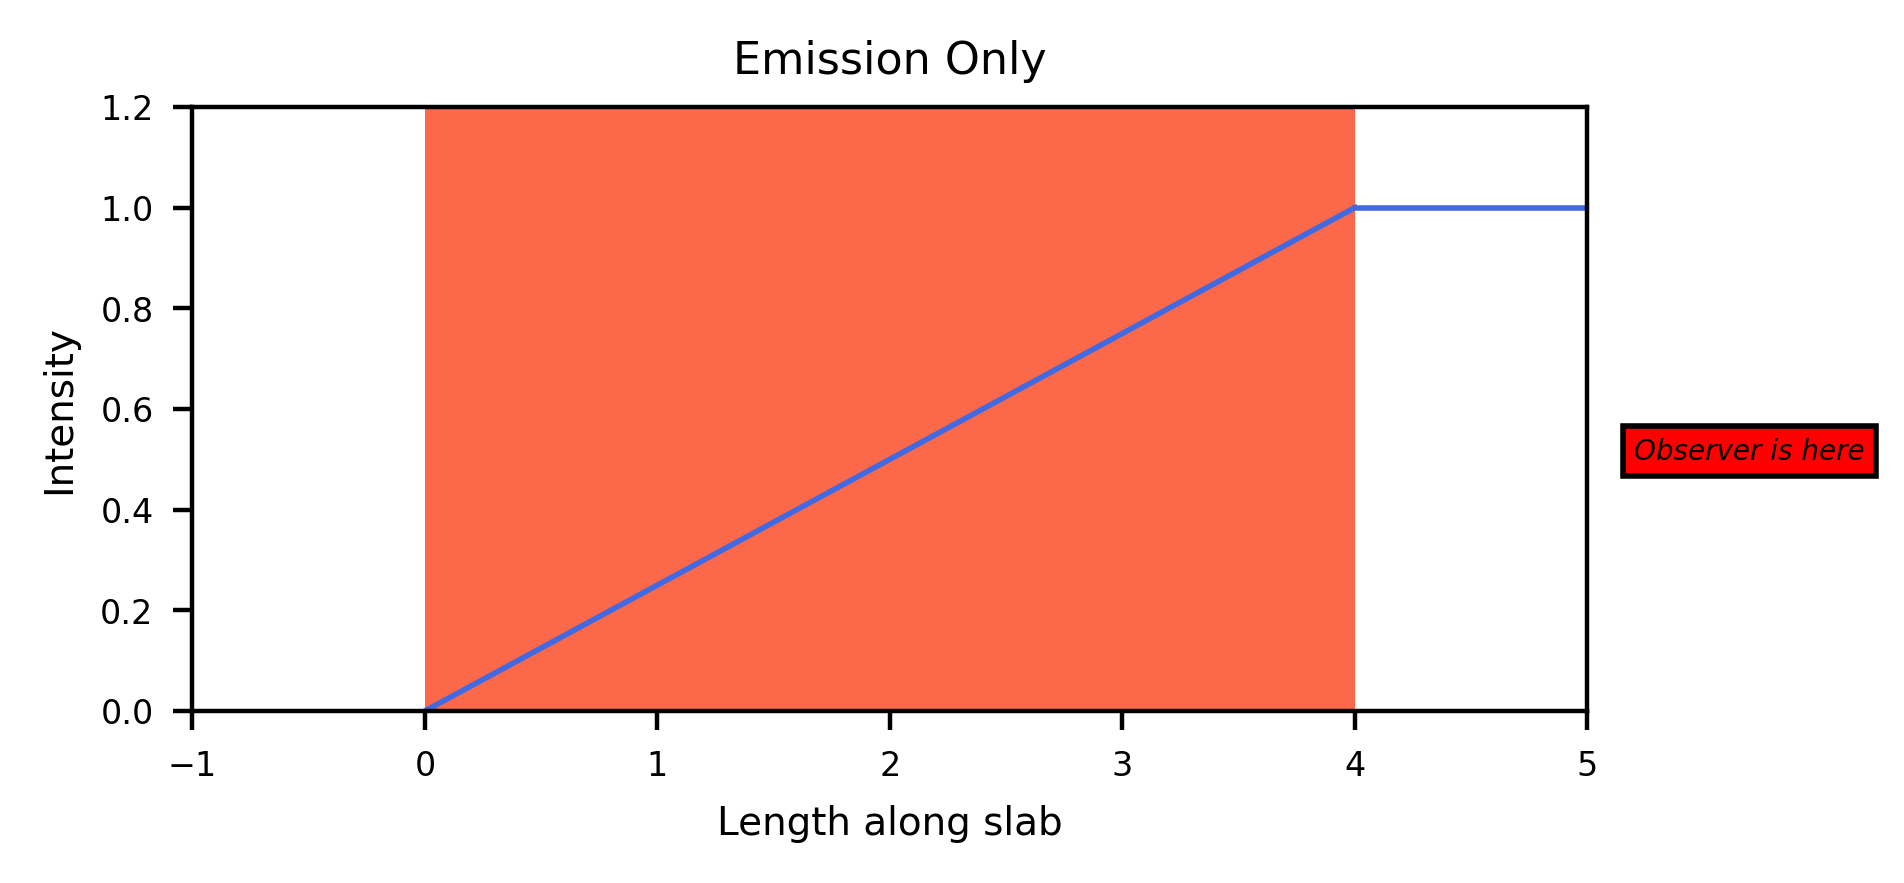

In [3]:
fig, ax = plt.subplots(1,1, figsize=(4.5,2))
#plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle( (0, 0), 4 , 1.2, fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':2,'linewidth':1},fontsize=5)

ax.set_xlabel('Length along slab',fontsize=7)
ax.set_ylabel('Intensity',fontsize=7)
ax.set_title('Emission Only',fontsize=8)

#---------------------------------------
#---------------------------------------
# At home

ss = np.arange(0,4.1,0.1)

io = 0 
L = 4
j_rho=0.25

I=io+j_rho*ss

ax.plot(ss,I, color='royalblue',linewidth=1)

ax.plot([4,5], [I[I.size-1]]*2, lw=1, color='royalblue')

ax.tick_params(axis='both', which='major', labelsize=6)

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>



### b. Now consider the emission inside a slab with density varying such that:

$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right) $$
and for which the emiisivity is still constant $j(s)=j_o$.

>**TODO**:
>
> a. Find an expression for the intensity $I(s)$ everywhere in the slab and show your work below
>
> b. Analytically, find what the value of $\rho_o j_o$ has to be for the final intensity to be the same than that of #1a. Show your work below.
>
> c. Add a curve for $I(s)$ to the graph below. 

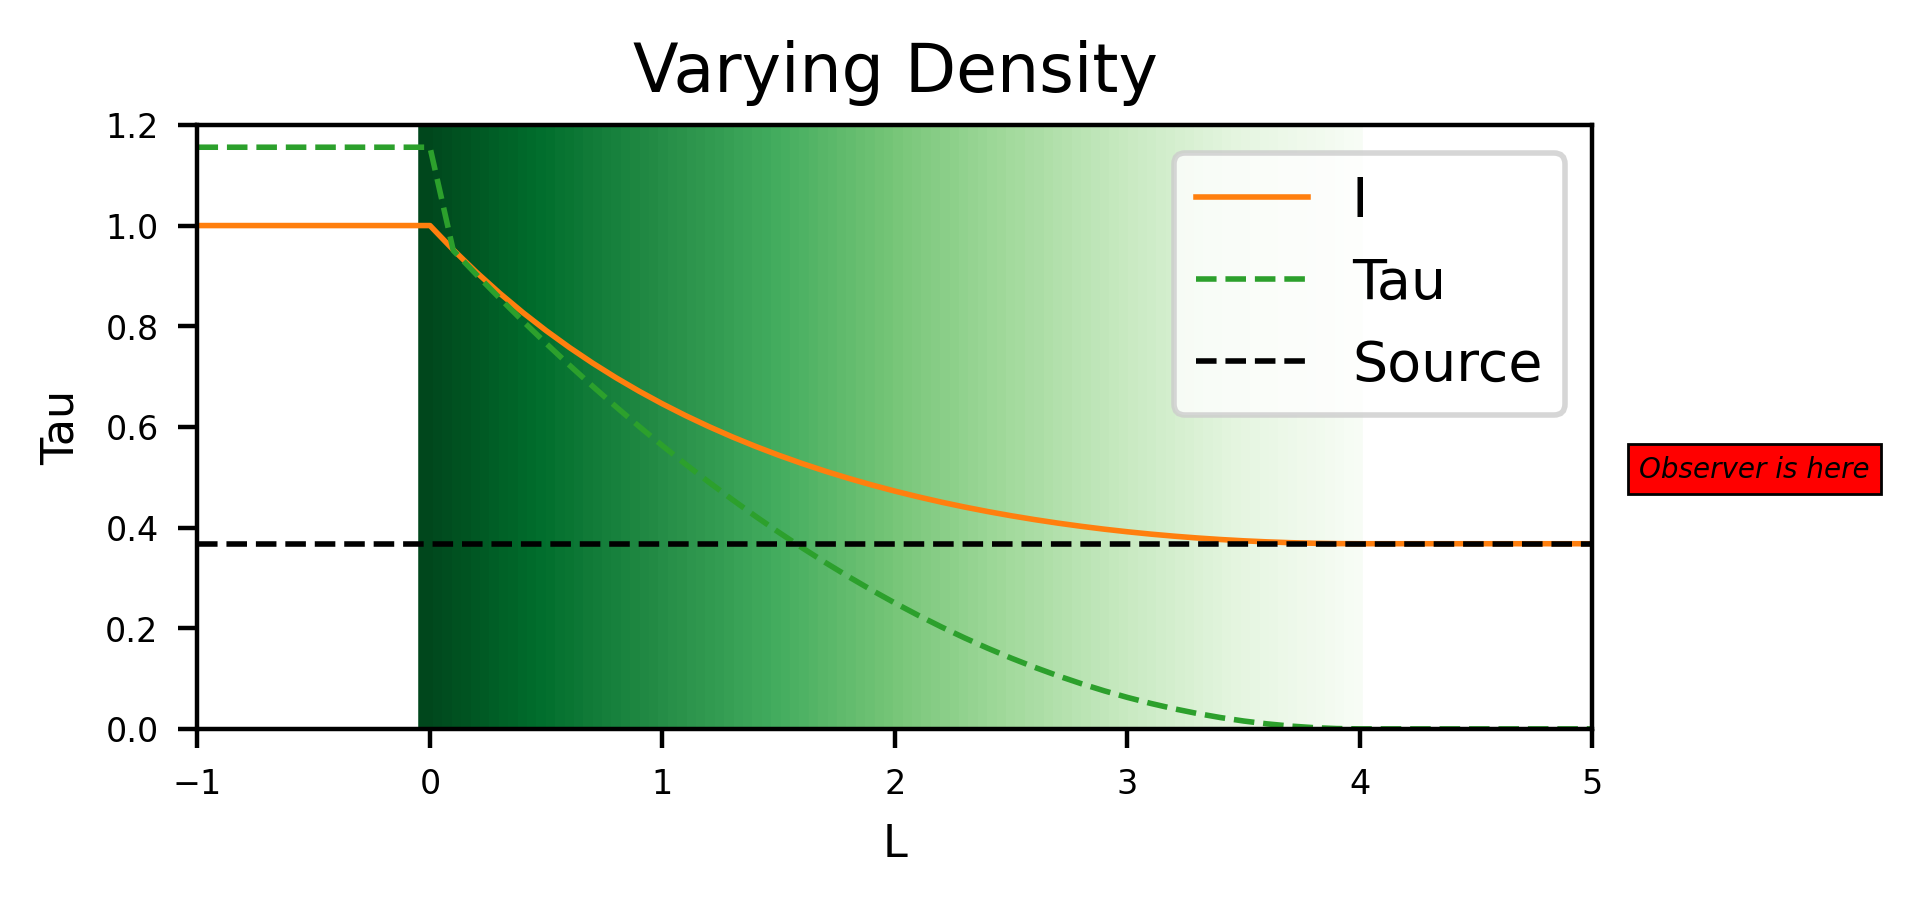

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4.5,2))
#plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0,1.2)
ax.set_xlim(-1,5)
ax.set_title('Varying Density')

# Create a patch with a gradient to illustrate
# the change in density
x=np.linspace(0,4,100)

x2=np.copy(x)*0

for num in range(len(x2)):
    newloc=len(x2)-num-1
    x2[newloc]=x[num]

y1=np.copy(x)*0
y2=np.copy(x)*0+4
g = 1.0-np.copy(x/4)
rainbow_fill_between(ax,x2,y1,y2)

ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':2,'linewidth':0.5},fontsize=5)

#---------------------------------------
#---------------------------------------
# At home

io=1
kappa_rho=0.25*2
L=4
ss=np.arange(-1,5.1,0.1)
I=io*np.exp(-0.5*kappa_rho*ss*(2.0-ss/L))

n=np.where(ss<0)
I[n[0]]=io
n=np.where(ss>=3.99)
I[n[0]]=I[n[0][0]]

ax.plot(ss,I,linewidth=1,label='I')


tau=kappa_rho*(0.5*ss**2/L - ss + 0.5*L)

n=np.where(ss>L)
tau[n[0]]=0

n=np.where(ss<=0)
leng=len(n[0])
tau[n[0]]=tau[n[0][leng-L]]

ax.plot(ss,tau,ls='--',linewidth=1,label='Tau')
ax.set_xlabel('L',fontsize=8)
ax.set_ylabel('Tau',fontsize=8)
ax.plot([-1,5],[io/np.e]*2,ls='--',c='k',linewidth=1,label='Source')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend()

**TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>


## 2. Now let's look at the case where there is both absorption and emission. 

In class, we found the 'formal solution' of RT to be:
$$I(\tau) ~~=~~ ~ I_o\mathrm{e}^{\tau-\tau_o} ~+~ \int_{\tau'=\tau_o}^{\tau'=\tau} S(\tau')~ \mathrm{e}^{\tau-\tau'}d\tau'$$

### a. Constant source function ($S(\tau)=So$)

In this case, the , the formal solution can be written as:
$$I(s) ~~=~~ ~ I_o\mathrm{e}^{\tau(s)-\tau_o} ~+~ S_o\left[1-\mathrm{e}^{\tau(s)-\tau_o}\right]$$

Here, let's consider that everything else is also constant: $\rho(s)=\rho_o$ and $j(s)=j_o$.

Numerical values are defined in the code below. 

>**TODO**:
>
> 1. Find an expression for $\tau(s)-\tau_o$. Show your work.
> 2. In the graph below, add a curve for the first term of the $I(s)$ equation. Make sure to add a legend.
> 3. In the graph below, add a curve for the second term of the $I(s)$ equation. Make sure to add a legend.
> 4. In the graph below, add a curve for $I(s)$ itself. Make sure to add a legend.
>
> Note: I have shown what the graph should look like in the class slides :)

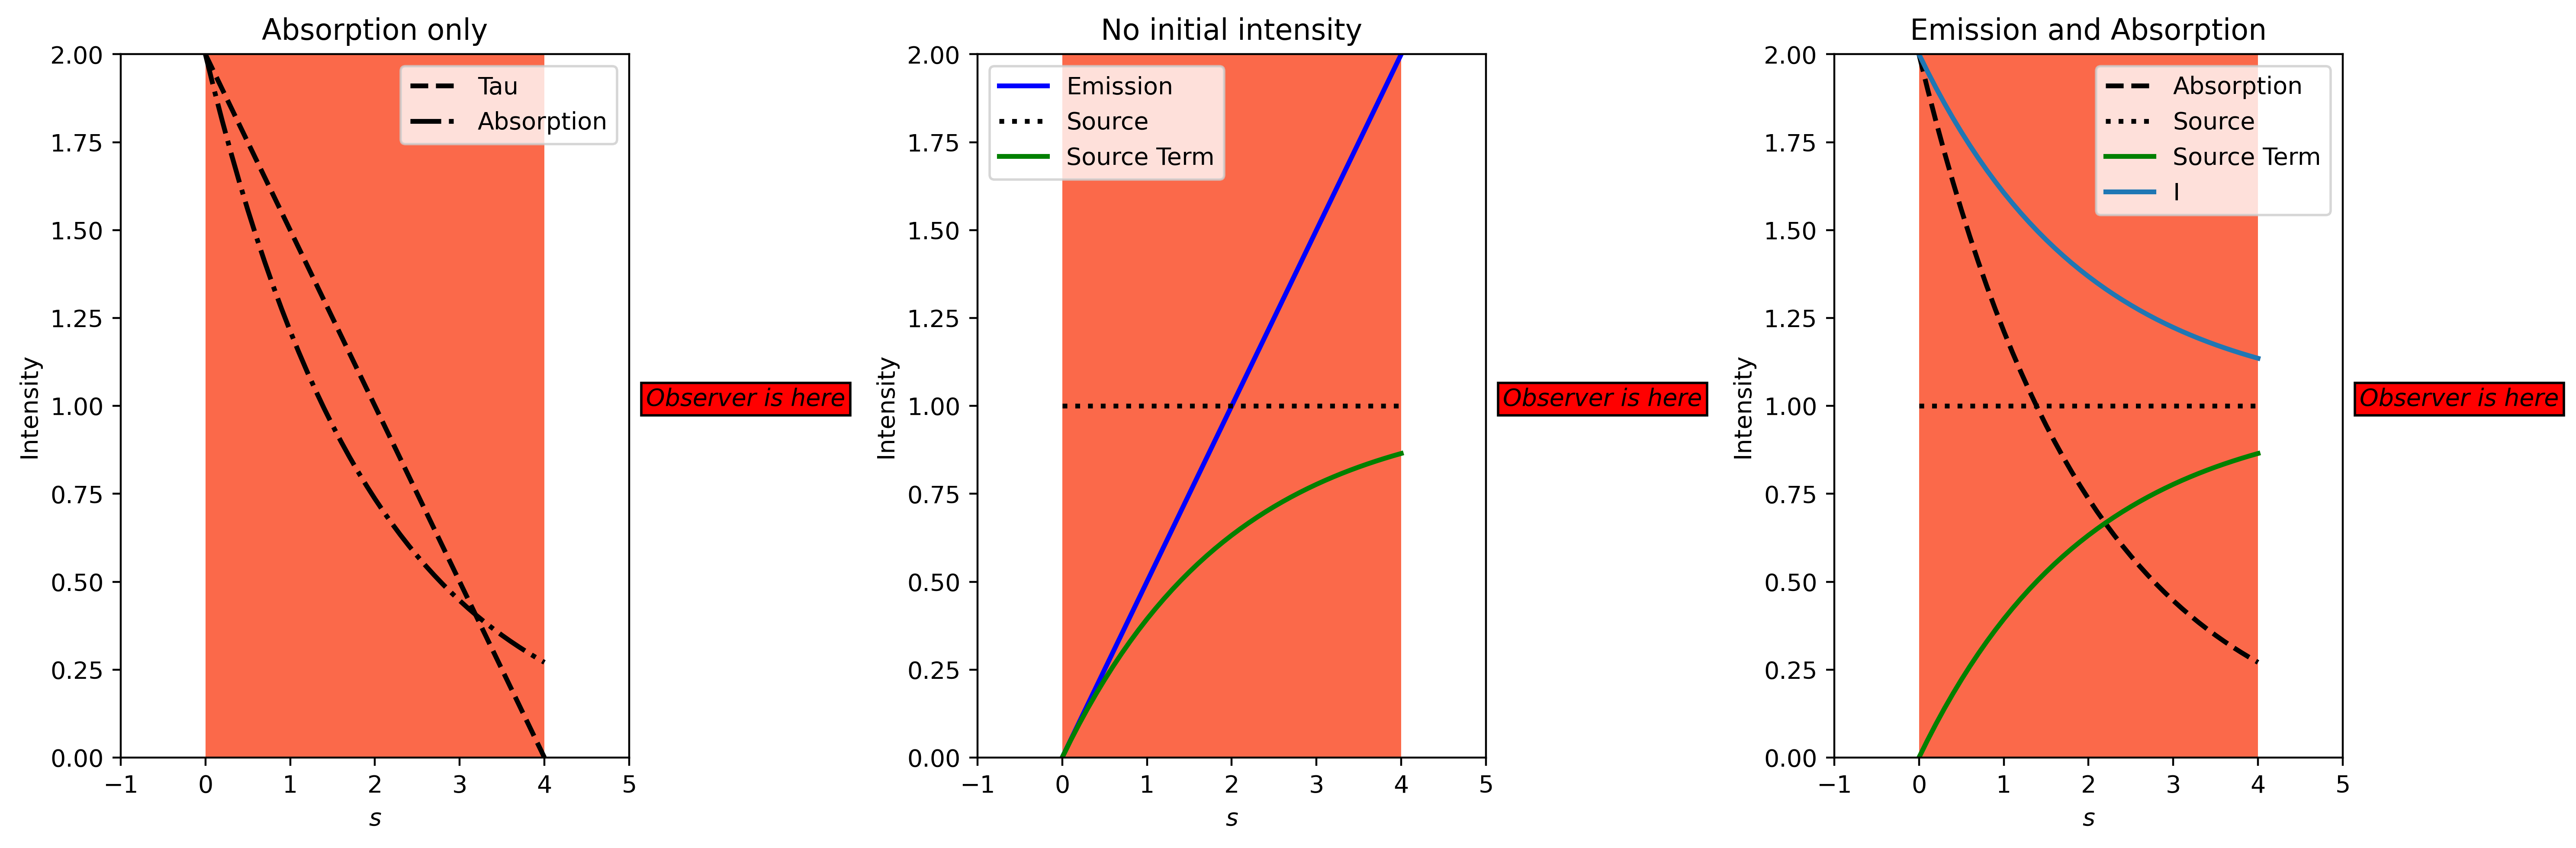

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
#plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'font.family': 'Times New Roman'})

   
# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
#rec = mpatches.Rectangle( (0, 0), 4 , 2, fc=rgba) # Create a shaded rectangle

for item in ax:
    item.add_patch(mpatches.Rectangle( (0, 0), 4 , 2, fc=rgba)) # add the rectangle to the plot
    item.text(5.2, 1, 'Observer is here', style='italic',bbox={'facecolor':'red', 'pad':2},fontsize=10)

    item.set_ylabel('Intensity')
    item.set_xlabel('$s$')
    item.set_ylim(0,2)
    item.set_xlim(-1,5)


#---------------------------------------------------------
# Here are the values for already defined for this problem

ax[0].set_title('Absorption only')
ax[1].set_title('No initial intensity')
ax[2].set_title('Emission and Absorption')

io = 2
j_rho = 0.5
kappa_rho = 0.5
s = j_rho / kappa_rho
L = 4

ss = np.arange(0,4.1, 0.1)

# Curve for the source function value

tau=kappa_rho*(L-ss)
ax[0].plot(ss,tau,ls='--',lw=2,c='k',label='Tau')

tau_tau2=-1*kappa_rho*ss

####
absorb=io*np.exp(tau_tau2)
ax[0].plot(ss,absorb,ls='dashdot',lw=2,c='k',label='Absorption')
ax[2].plot(ss,absorb,ls='--',lw=2,c='k',label='Absorption')


#####
em=j_rho*ss
ax[1].plot(ss,em,c='blue',lw=2,label='Emission')

source=np.array([s]*ss.size)
ax[1].plot(ss,source,ls='dotted',c='k',lw=2,label='Source')
ax[2].plot(ss,source,ls='dotted',c='k',lw=2,label='Source')

####
sourceterm=s*(1.0-np.exp(tau_tau2))
ax[1].plot(ss,sourceterm,lw=2,c='green',label='Source Term')
ax[2].plot(ss,sourceterm,lw=2,c='green',label='Source Term')

I=absorb+sourceterm
ax[2].plot(ss,I,lw=2,label='I')

ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

### b. Constant source function ($S(\tau)=So$) but linearly decreasing density

 > **TODO**: Re-do what we did in #2a, assuming this time that the density is decreasing linearly such that:
$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right), $$ where $d$ is the length of the slab.
>
>Note: You can directly use some of the results from your previous notebook (e.g. for the optical depth).  

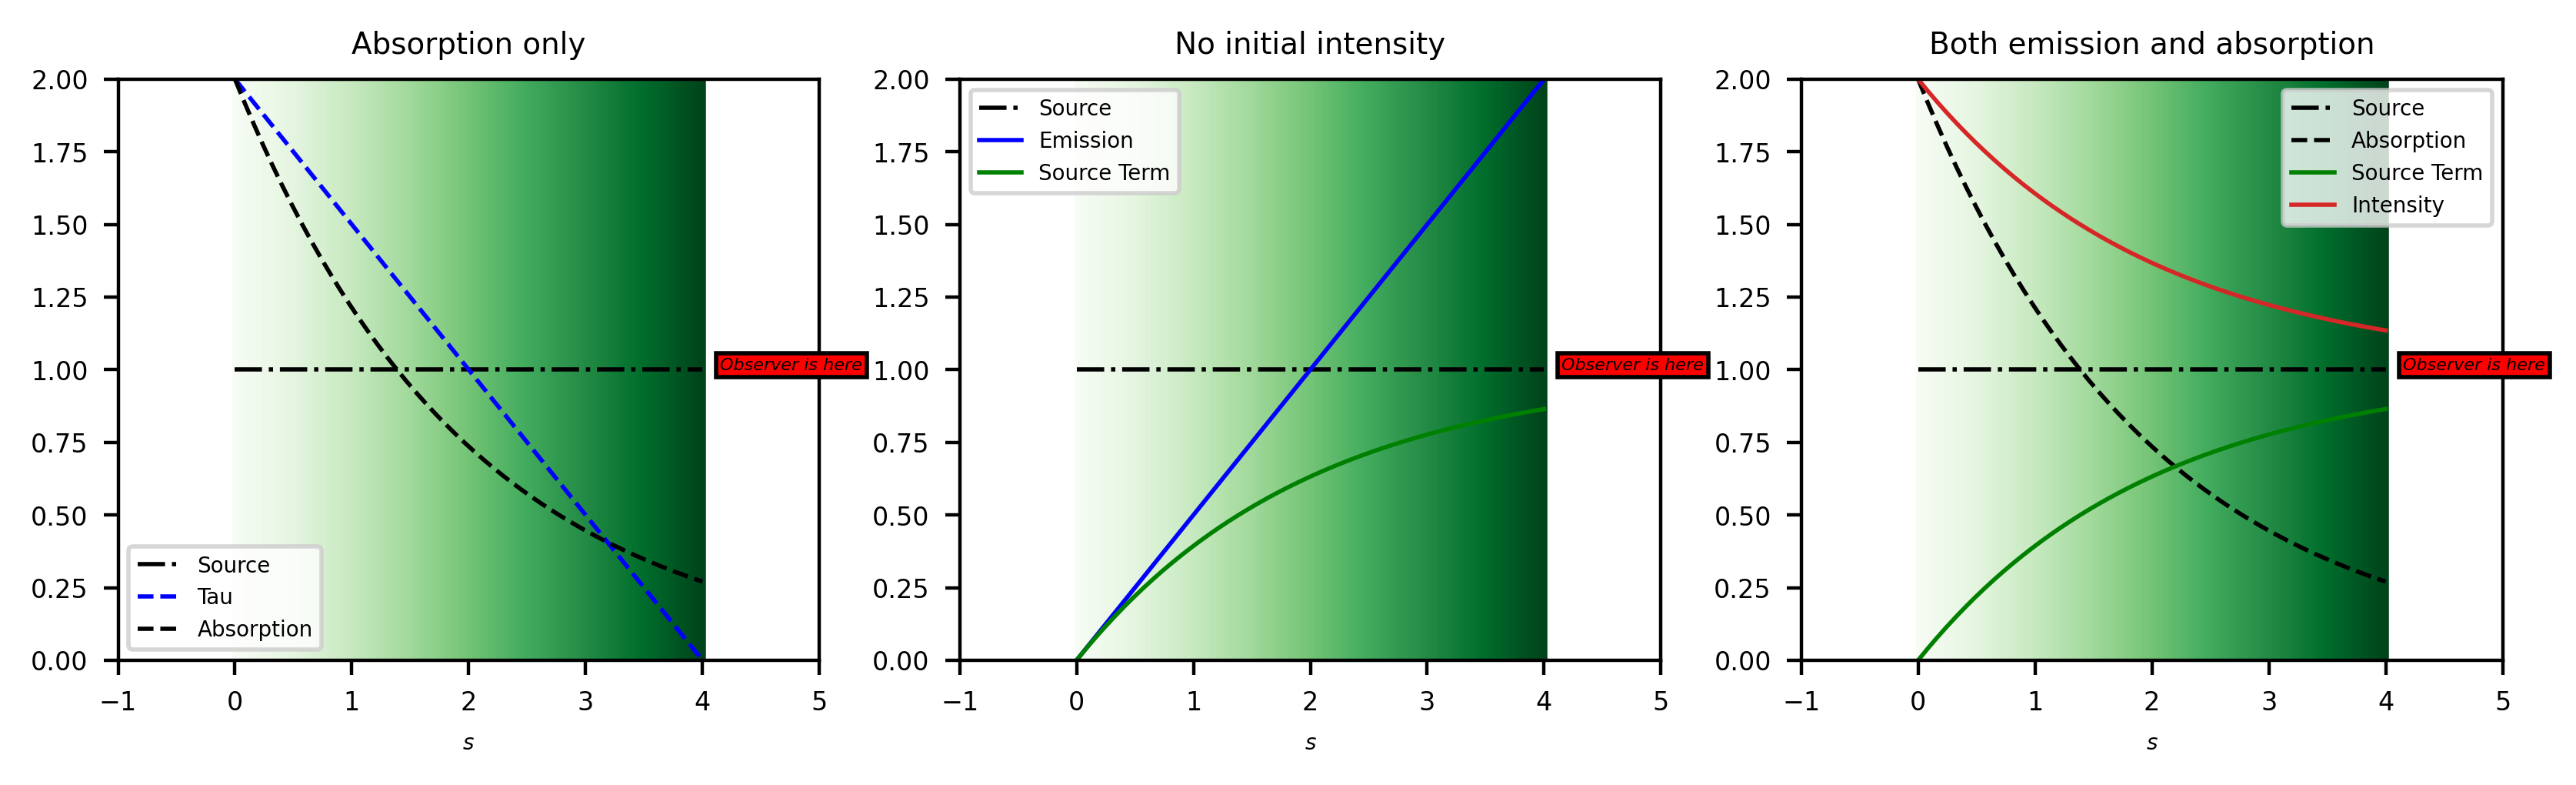

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10,2.5))
#plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'font.family': 'Times New Roman'})

for item in ax:
    
    item.set_ylim(0, 2)
    item.set_xlim(-1,5)
    
ax[0].set_title('Absorption only',fontsize=7)
ax[1].set_title('No initial intensity',fontsize=7)
ax[2].set_title('Both emission and absorption',fontsize=7)

# Create a patch with a gradient to illustrate
# the change in density

x=np.linspace(0,4,400)
Y1=np.copy(x)*0
Y2=np.copy(x)*0+4
g = 1.0-np.copy(x/1)
for item in ax:
    rainbow_fill_between(item,x,Y1,Y2)
    
    item.text(4.15, 1, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':1, 'lw':1},fontsize=4)

    item.set_xlabel('$s$',fontsize=5)

#---------------------------------------------------------
# Here are the values for already defined for this problem
    
io = 2
j_rho = 0.5
kappa_rho = 0.5
S = j_rho / kappa_rho
d = 4

ss = np.linspace(0,4, 50)

# Curve for the source function value
source = np.array( [S]*ss.size )

for item in ax:
    item.plot(ss, source, ls='dashdot', c='k',label='Source',lw=1)
#---------------------------------------
#---------------------------------------
tau=kappa_rho*(L-ss)
ax[0].plot(ss,tau,ls='--',lw=1,c='b',label='Tau')

tau_tau2=-1*kappa_rho*ss

####
absorb=io*np.exp(tau_tau2)
ax[0].plot(ss,absorb,ls='--',lw=1,c='k',label='Absorption')
ax[2].plot(ss,absorb,ls='--',lw=1,c='k',label='Absorption')


#####
em=j_rho*ss
ax[1].plot(ss,em,c='blue',label='Emission',lw=1)

####
sourceterm=s*(1.0-np.exp(tau_tau2))
ax[1].plot(ss,sourceterm,lw=1,c='green',label='Source Term')
ax[2].plot(ss,sourceterm,lw=1,c='green',label='Source Term')

I=absorb+sourceterm
ax[2].plot(ss,I,label='Intensity',lw=1)

ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[2].legend(fontsize=5)

ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

**TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 3. Case when the source function is not constant.

Let's assume that the density and opacity in the slab are constant, such that $\kappa_o\rho_o=2.0$ per unit length. 

The source function is however a function of $\tau$ such that:
$$ S(\tau) = S_0 + S_1\tau$$
where $S_0=0.5$ intensity unit, and $S_1=1.3$ intensity units per optical depth unit. 

There is no intial intensity entering the slab so $I_o = 0$.

Prepare your code such that you can vary the values of the paramters in the equations above.

### a. Find an expression for $I(\tau)$.
>**TODO**: In this case, you cannot use the expression we found for the constant source function. You will have to start back at the expression for the formal solution itself. Show your work below

### b. On your graph add a curve for:
>**TODO**:
>1. the optical depth $\tau$ as a function of $s$.
>2. the source function $S$ as a function of $s$.
>3. the intensity $I$ as a function of $s$. 
>
>4. Concentrating on the side of your graph where the light exits the slab, estimate the optical depth at which the value of the source function is equal to the value of the intensity emerging from the slab. 

Text(0.5, 1.0, 'Varying Source Function')

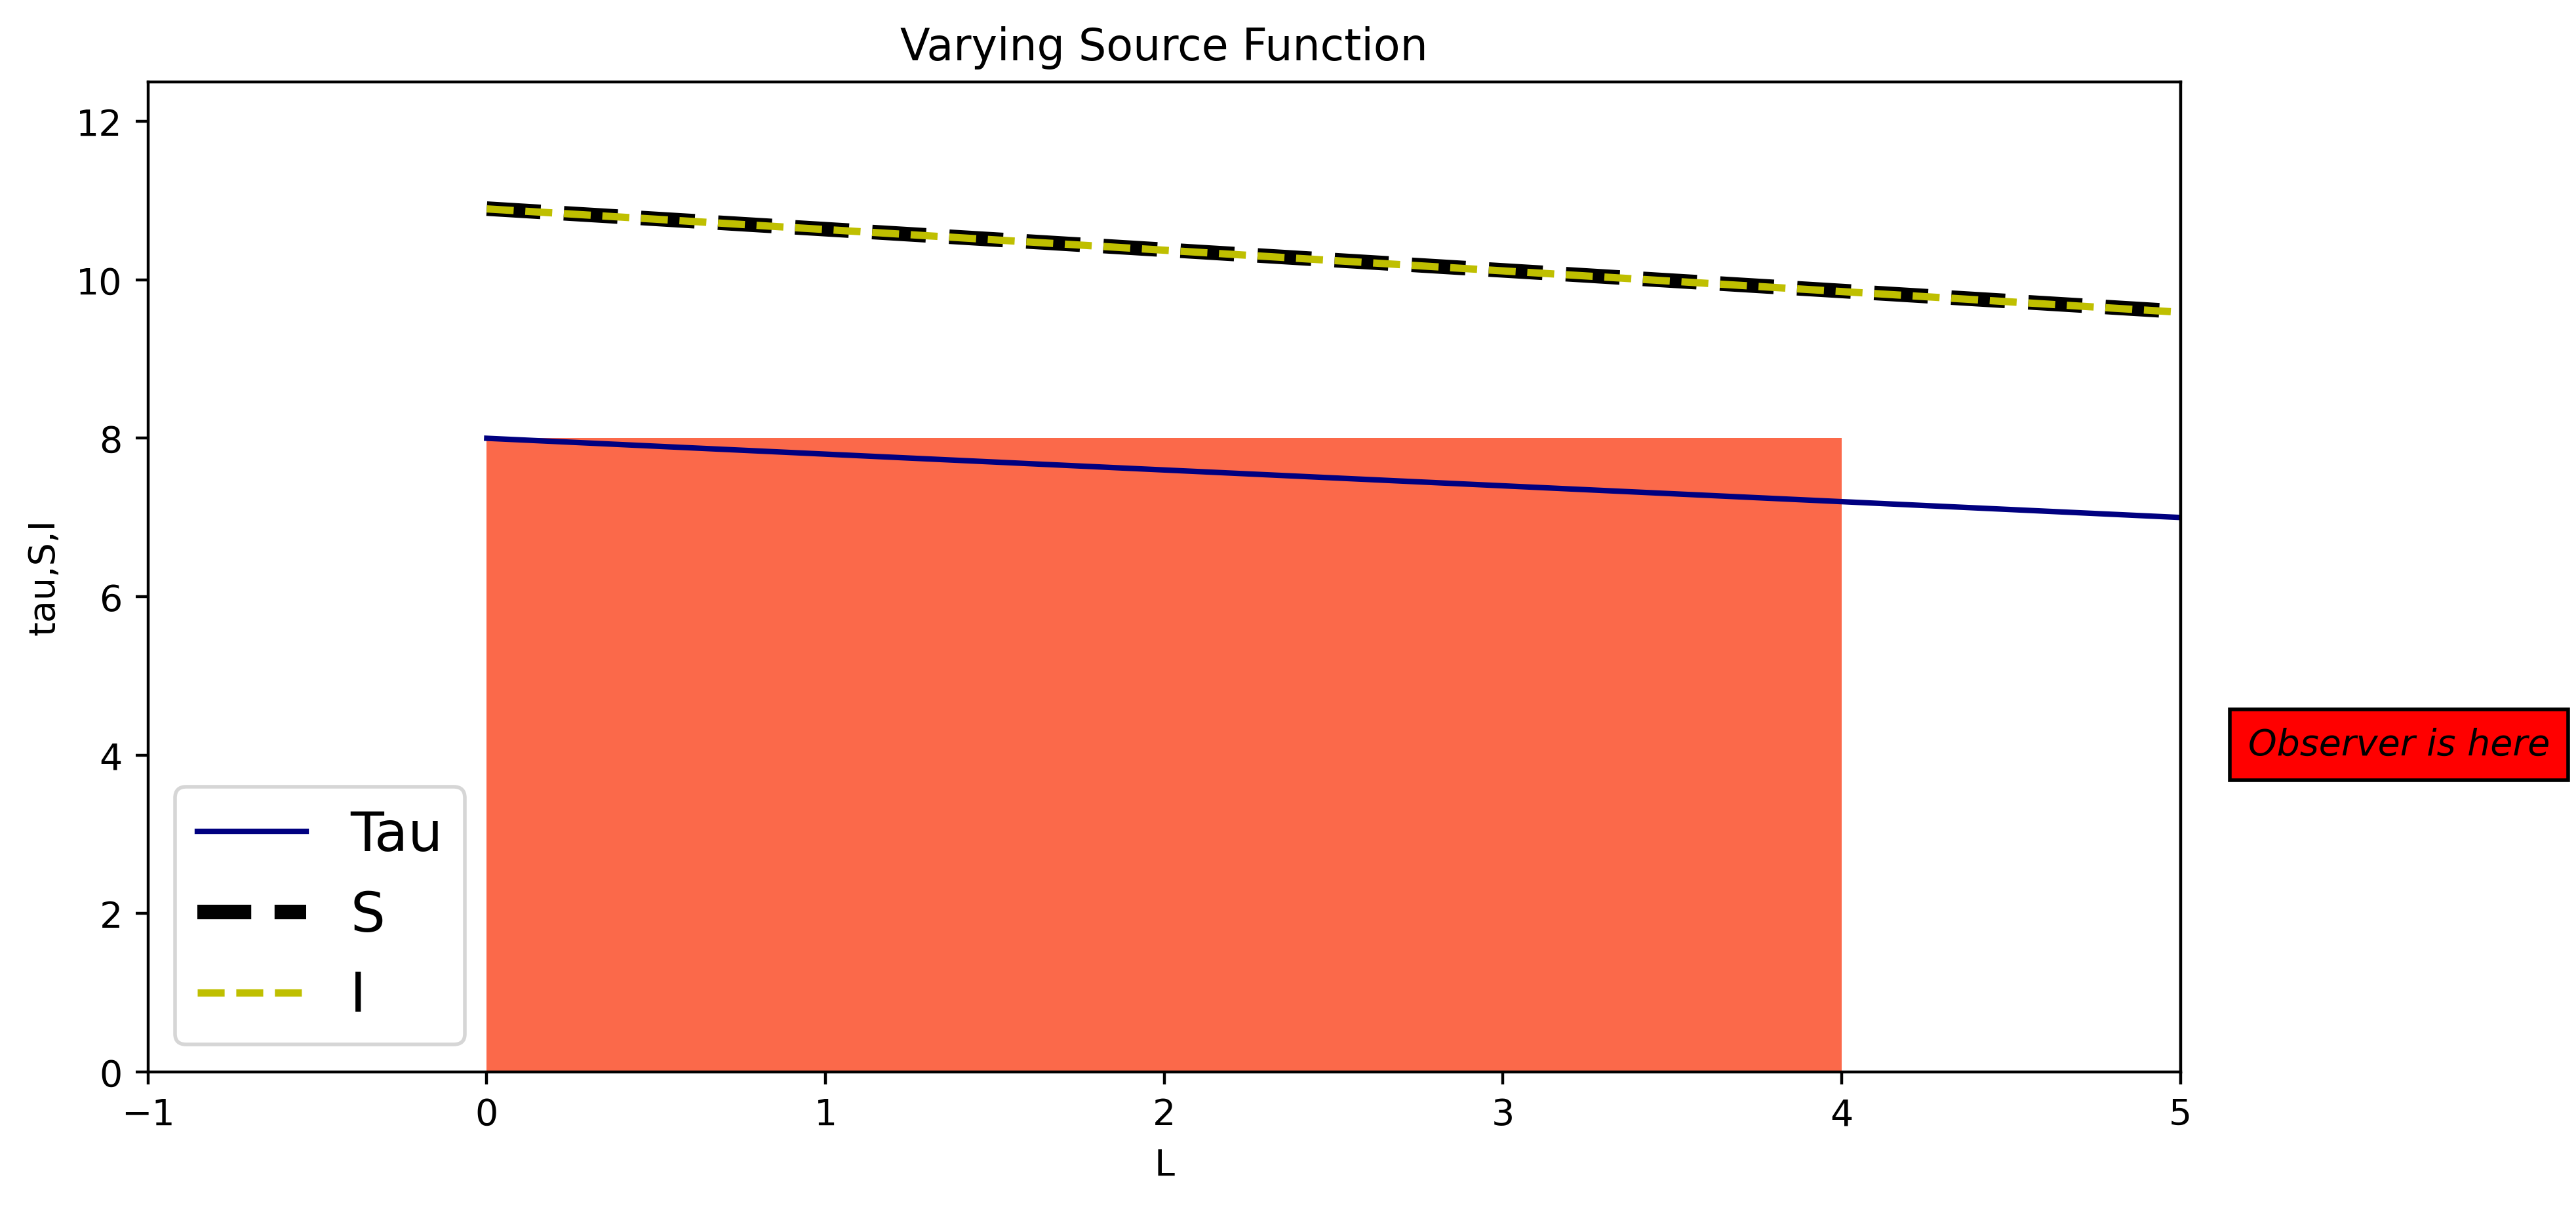

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
#plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 12.5)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle((0,0),4,8,fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot

ax.text(5.2, 4, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

# Values to use

l=4

io = 0
kappa_rho = 2.0

S0 = 0.5
S1 = 1.3

ss = np.arange(0,4.1,0.1)

#---------------------------------------
#---------------------------------------
# At home
tau=kappa_rho*(l-ss)
s=S0+S1*tau
i=io*np.exp(-1.0*tau)+s*(1-np.exp(-1.0*tau))

ax.plot(tau,c='navy')
ax.plot(s,ls='--',linewidth=4,c='k')
ax.plot(i,ls='--',linewidth=2,c='y')
ax.set_xlabel('L')
ax.set_ylabel('tau,S,I')

ax.legend(['Tau', 'S', 'I'],fontsize='15',loc='lower left')
ax.set_title('Varying Source Function')


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>